<a href="https://colab.research.google.com/github/giorginolab/MD-Trajectory-Tutorial-UniPD-2022/blob/main/Python_MDTraj_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD analysis: MDTraj

## Prof. Fuxreiter's course, University of Padua
*Toni Giorgino, IBF-CNR, Italy* - www.giorginolab.it

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display. 
 * To start from scratch, restart the runtime. 
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)







# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [1]:
# Get the data files
! git clone https://github.com/giorginolab/MD-Trajectory-Tutorial-UniPD-2022

Cloning into 'MD-Trajectory-Tutorial-UniPD-2022'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [2]:
%cd /content/MD-Trajectory-Tutorial-UniPD-2022/data

/content/MD-Trajectory-Tutorial-UniPD-2022/data


In [3]:
!ls -l

total 18008
-rw-r--r-- 1 root root   599001 Apr 28 00:18 hivcompl_amber.pdb
-rw-r--r-- 1 root root 10728872 Apr 28 00:18 hivcompl_md5.nc
-rw-r--r-- 1 root root  3423268 Apr 28 00:18 hivcompl_md5.xtc
-rw-r--r-- 1 root root  3682145 Apr 28 00:18 hivcompl.prmtop


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use the little "folder" icon on the left.

# Install and import the library

In [4]:
!pip install mdtraj

     |████████████████████████████████| 2.1 MB 33.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp37-cp37m-linux_x86_64.whl size=5533694 sha256=4060822f7dd462abf80405c1cda9693281c16b20fc88fc333a01df8447034c1c
  Stored in directory: /root/.cache/pip/wheels/6f/84/9d/6854e5264a4423209de26a6e4b34d13750289c72ba0439bbfd
Successfully built mdtraj


In [19]:
import mdtraj as mdt
import numpy as np
import matplotlib.pyplot as plt

# Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions. Access to the molecular properties will use the MDTraj functions ([manual](https://www.mdtraj.org)).  

Rewriting them in one of the other libraries and languages may be an useful exercise.

# Load the trajectory

In [6]:
t = mdt.load("hivcompl_md5.nc", top="hivcompl.prmtop")

In [7]:
t

<mdtraj.Trajectory with 100 frames, 8940 atoms, 544 residues, without unitcells at 0x7f1ab367ba10>

In [8]:
t.topology

<mdtraj.Topology with 1 chains, 544 residues, 8940 atoms, 9059 bonds at 0x7f1ab36dc1d0>

# Enumerating and slicing

In [9]:
t.topology.select("resname EFZ")

array([8910, 8911, 8912, 8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920,
       8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931,
       8932, 8933, 8934, 8935, 8936, 8937, 8938, 8939])

In [12]:
t.topology.select_expression("resname EFZ")

"[atom.index for atom in topology.atoms if (atom.residue.name == 'EFZ')\n]"

In [20]:
np.array([atom.index for atom in t.topology.atoms if (atom.residue.name == 'EFZ')])

array([8910, 8911, 8912, 8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920,
       8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931,
       8932, 8933, 8934, 8935, 8936, 8937, 8938, 8939])

In [16]:
[atom.element for atom in t.topology.atoms if (atom.residue.name == 'EFZ')]

[(17, 'chlorine', 'Cl', 35.4532, 0.227),
 (9, 'fluorine', 'F', 18.99840325, 0.147),
 (9, 'fluorine', 'F', 18.99840325, 0.147),
 (9, 'fluorine', 'F', 18.99840325, 0.147),
 (8, 'oxygen', 'O', 15.99943, 0.152),
 (8, 'oxygen', 'O', 15.99943, 0.152),
 (7, 'nitrogen', 'N', 14.00672, 0.155),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (6, 'carbon', 'C', 12.01078, 0.17),
 (1, 'hydrogen', 'H', 1.007947, 0.12),
 (1, 'hydrogen', 'H', 1.007947, 0.12),
 (1, 'hydrogen', 'H', 1.007947, 0.12),
 (1, 'hydrogen', 'H', 1.007947, 0.12),
 (1, 'hydrogen', 'H', 1.007947, 0.12),
 

In [34]:
prot = t.atom_slice(t.topology.select("protein"))

In [35]:
prot

<mdtraj.Trajectory with 100 frames, 8910 atoms, 543 residues, without unitcells at 0x7f1ab34a0f50>

In [36]:
efz = t.atom_slice(t.topology.select("resname EFZ"))

In [37]:
efz

<mdtraj.Trajectory with 100 frames, 30 atoms, 1 residues, without unitcells at 0x7f1ab26d0790>

# RMSD

In [52]:
rmsd_prot = mdt.rmsd(prot,prot)

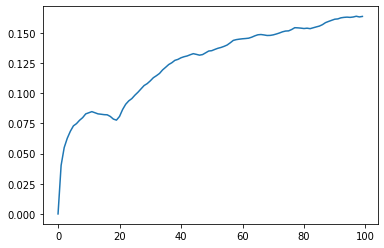

In [53]:
plt.plot(rmsd_prot)

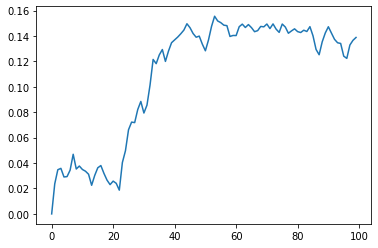

In [54]:
rmsd_efz = mdt.rmsd(efz,efz)
plt.plot(rmsd_efz)

# RMSF

It is an indication of the fluctuation of each atom (or residue) - the average squared displacement with respect to a "rest" (reference) position. Generally relates to disorder, and crystallographic B factors.

In [57]:
rmsf_prot = mdt.rmsf(prot,prot, atom_indices=prot.topology.select("name CA"))

In [58]:
rmsf_prot.shape

(543,)

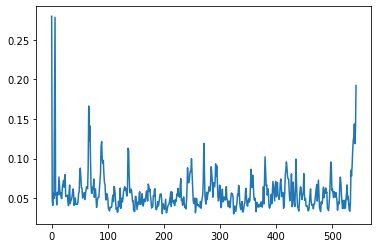

In [59]:
plt.plot(rmsf_prot)

# Distance between center of masses

In [43]:
prot_com=mdt.compute_center_of_mass(prot)
prot_com[1:5,]

array([[ 1.17315743, -1.86143375,  2.68262688],
       [ 1.17222083, -1.86140517,  2.6825325 ],
       [ 1.17162196, -1.8610747 ,  2.68197756],
       [ 1.17101371, -1.86123077,  2.68060318]])

In [44]:
efz_com=mdt.compute_center_of_mass(efz)
efz_com[1:5,]

array([[-0.06894955, -3.46304045,  2.4417674 ],
       [-0.06202532, -3.45649114,  2.44398806],
       [-0.06354196, -3.45437213,  2.43717993],
       [-0.06805557, -3.45538715,  2.44155117]])

In [45]:
dcom = prot_com-efz_com

In [49]:
dcoml = np.linalg.norm(dcom,axis=1)

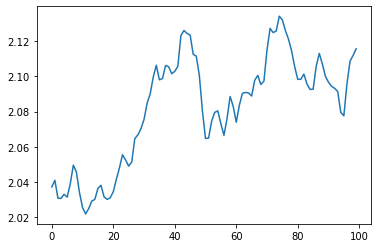

In [50]:
plt.plot(dcoml)

# Contacts

In [68]:
??mdt.core.topology.Residue

In [70]:
efz_idx = [res.index for res in t.topology.residues if res.name == "EFZ"]
efz_idx

[543]

In [72]:
prot_idx = [res.index for res in t.topology.residues if res.name != "EFZ"]
prot_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [80]:
import itertools
clists = itertools.product(efz_idx,prot_idx)
clists = np.array(list(clists))

In [89]:
cont, _ = mdt.compute_contacts(t, clists)
cont.shape

(100, 543)

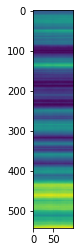

In [90]:
plt.imshow(cont.T)

In [88]:
cont

array([[2.5096595, 2.5243084, 2.2524314, ..., 6.824193 , 6.648153 ,
        7.0947237],
       [2.4865365, 2.4860497, 2.229067 , ..., 6.877668 , 6.6941586,
        7.139991 ],
       [2.4789855, 2.4887307, 2.2120888, ..., 6.848234 , 6.648461 ,
        7.1478424],
       ...,
       [2.4771783, 2.5931494, 2.2980049, ..., 6.9251757, 7.125567 ,
        7.364703 ],
       [2.4621131, 2.5787563, 2.2664378, ..., 6.951645 , 7.08812  ,
        7.3913584],
       [2.4258027, 2.5312088, 2.2303612, ..., 6.9606137, 7.057011 ,
        7.420653 ]], dtype=float32)

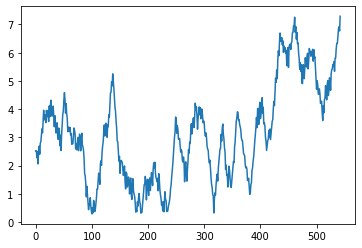

In [92]:
plt.plot(cont[50,:])